In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

In [41]:
london_df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/statistics/london.csv", parse_dates=True)
london_df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [42]:
london_df.timestamp = pd.to_datetime(london_df.timestamp)

In [47]:
london_df = london_df.set_index('timestamp')

In [48]:
london_df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
s_mean          float64
dtype: object

In [7]:
sns.lineplot(data=london_df, x=london_df.timestamp, y=london_df.cnt)

AttributeError: 'DataFrame' object has no attribute 'timestamp'

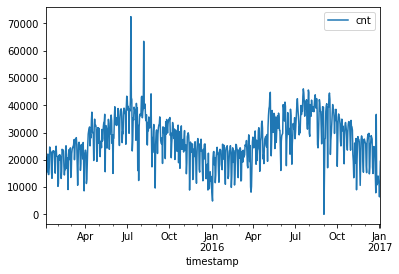

In [8]:
london_df.resample(rule='D').agg({'cnt':'sum'}).plot()

In [49]:
london_df = london_df.resample(rule='D').agg({'cnt':'sum'})

In [16]:
london_df 

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


In [51]:

london_df['s_mean'] = london_df.cnt.rolling(window=3).mean()
london_df

,cnt,s_mean
timestamp,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,16739.666667
2015-01-07,21064,20683.000000
2015-01-08,15601,19092.666667
...,...,...
2016-12-30,11566,12682.000000
2016-12-31,11424,12347.333333
2017-01-01,6421,9803.666667


In [21]:
round(london_df.query('timestamp == "2015-07-09"'))

,cnt,mean,s_mean
timestamp,,,
2015-07-09,72504,50705.0,50705.0


In [33]:
london_df['diff'] = london_df.cnt - london_df.s_mean
london_df = london_df.dropna()
london_df.reset_index()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,timestamp,cnt,mean,s_mean,diff,upper_bound,lower_bound
0,2015-01-06,20613,16739.666667,16739.666667,3873.333333,28482.585854,4996.747479
1,2015-01-07,21064,20683.000000,20683.000000,381.000000,32425.919188,8940.080812
2,2015-01-08,15601,19092.666667,19092.666667,-3491.666667,30835.585854,7349.747479
3,2015-01-09,22104,19589.666667,19589.666667,2514.333333,31332.585854,7846.747479
4,2015-01-10,14709,17471.333333,17471.333333,-2762.333333,29214.252521,5728.414146
...,...,...,...,...,...,...,...
724,2016-12-30,11566,12682.000000,12682.000000,-1116.000000,24424.919188,939.080812
725,2016-12-31,11424,12347.333333,12347.333333,-923.333333,24090.252521,604.414146
726,2017-01-01,6421,9803.666667,9803.666667,-3382.666667,21546.585854,-1939.252521
727,2017-01-02,11823,9889.333333,9889.333333,1933.666667,21632.252521,-1853.585854


In [28]:
london_df_std = np.std(london_df['diff'])

In [32]:
london_df['upper_bound'] = london_df.s_mean + 2.576 * london_df_std
london_df['lower_bound'] = london_df.s_mean - 2.576 * london_df_std

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
london_df = london_df.reset_index()

In [35]:
london_df['upper_bound'] = london_df.s_mean + 2.576 * london_df_std
london_df['lower_bound'] = london_df.s_mean - 2.576 * london_df_std

In [36]:
london_df

,timestamp,cnt,mean,s_mean,diff,upper_bound,lower_bound
0,2015-01-06,20613,16739.666667,16739.666667,3873.333333,28482.585854,4996.747479
1,2015-01-07,21064,20683.000000,20683.000000,381.000000,32425.919188,8940.080812
2,2015-01-08,15601,19092.666667,19092.666667,-3491.666667,30835.585854,7349.747479
3,2015-01-09,22104,19589.666667,19589.666667,2514.333333,31332.585854,7846.747479
4,2015-01-10,14709,17471.333333,17471.333333,-2762.333333,29214.252521,5728.414146
...,...,...,...,...,...,...,...
724,2016-12-30,11566,12682.000000,12682.000000,-1116.000000,24424.919188,939.080812
725,2016-12-31,11424,12347.333333,12347.333333,-923.333333,24090.252521,604.414146
726,2017-01-01,6421,9803.666667,9803.666667,-3382.666667,21546.585854,-1939.252521
727,2017-01-02,11823,9889.333333,9889.333333,1933.666667,21632.252521,-1853.585854


In [37]:
london_df.upper_bound.round(2)

0      28482.59
1      32425.92
2      30835.59
3      31332.59
4      29214.25
         ...   
724    24424.92
725    24090.25
726    21546.59
727    21632.25
728    24302.92
Name: upper_bound, Length: 729, dtype: float64

In [40]:
london_df.query('cnt > upper_bound')

,timestamp,cnt,mean,s_mean,diff,upper_bound,lower_bound
184,2015-07-09,72504,50705.000000,50705.000000,21799.000000,62447.919188,38962.080812
212,2015-08-06,63468,46627.333333,46627.333333,16840.666667,58370.252521,34884.414146
607,2016-09-04,27512,14259.000000,14259.000000,13253.000000,26001.919188,2516.080812
719,2016-12-25,36653,19650.666667,19650.666667,17002.333333,31393.585854,7907.747479
